# 7B. Precipitation Distribution


Reference:

Ahn, M.-S., P. A. Ullrich, P. J. Gleckler, J. Lee, A. C. Ordonez, and A. G. Pendergrass, 2023: Evaluating Precipitation Distributions at Regional Scales: A Benchmarking Framework and Application to CMIP5 and CMIP6. Geoscientific Model Development, 16, 3927–3951, [doi: 10.5194/gmd-16-3927-2023](https://doi.org/10.5194/gmd-16-3927-2023)

## Running the code

In [1]:
%%bash
precip_distribution_driver.py --help

usage: precip_distribution_driver.py [-h] [--parameters PARAMETERS]
                                     [--diags OTHER_PARAMETERS [OTHER_PARAMETERS ...]]
                                     [--mip MIP] [--mod MOD] [--var VAR]
                                     [--frq FRQ] [--modpath MODPATH]
                                     [--results_dir RESULTS_DIR]
                                     [--case_id CASE_ID] [--prd PRD [PRD ...]]
                                     [--fac FAC] [--res RES [RES ...]]
                                     [--ref REF] [--ref_dir REF_DIR]
                                     [--exp EXP] [--ver VER] [--cmec]
                                     [--no_cmec]

options:
  -h, --help            show this help message and exit
  --parameters PARAMETERS, -p PARAMETERS
  --diags OTHER_PARAMETERS [OTHER_PARAMETERS ...], -d OTHER_PARAMETERS [OTHER_PARAMETERS ...]
                        Path to other user-defined parameter file. (default:
                      

### Prepare to run

In [2]:
from user_choices import demo_data_directory, demo_output_directory

Input data files are daily pr time series.

In [3]:
import os

input_data_ref = demo_data_directory + '/obs4MIPs_PCMDI_daily/NASA-JPL/GPCP-1-3/day/pr/gn/latest/' + 'pr_day_GPCP-1-3_PCMDI_gn_19961002-20170101.nc'
input_data_ref_dir = os.path.dirname(input_data_ref)
input_data_ref_file = os.path.basename(input_data_ref)

input_data_model = demo_data_directory + '/CMIP5_demo_timeseries/historical/atmos/day/pr/' + 'pr_day_GISS-E2-H_historical_r6i1p1_20000101-20051231.nc'
input_data_model_dir = os.path.dirname(input_data_model)
input_data_model_file = os.path.basename(input_data_model)

output_dir = demo_output_directory + '/precip_distribution/'

### Run for the reference dataset (GPCP)

Below process takes about 24 minutes

In [4]:
!precip_distribution_driver.py \
    --mip obs \
    --mod GPCP \
    --exp historical \
    --var pr \
    --frq day \
    --modpath $input_data_ref_dir \
    --mod $input_data_ref_file \
    --results_dir $output_dir \
    --case_id "pr_distribution_GPCP" \
    --prd 2000 2001 \
    --fac 86400 \
    --res 2 2 \
    --ref GPCP-1-3 \
    --ref_dir $input_data_ref_dir

demo_data_tmp/obs4MIPs_PCMDI_daily/NASA-JPL/GPCP-1-3/day/pr/gn/latest
pr_day_GPCP-1-3_PCMDI_gn_19961002-20170101.nc
[2000, 2001]
[2, 2]
Ref: GPCP-1-3
demo_output_tmp/precip_distribution/
demo_output_tmp/precip_distribution/
demo_output_tmp/precip_distribution/
['demo_data_tmp/obs4MIPs_PCMDI_daily/NASA-JPL/GPCP-1-3/day/pr/gn/latest/pr_day_GPCP-1-3_PCMDI_gn_19961002-20170101.nc']
dat, cal: GPCP-1-3 gregorian
Completed regridding (via Regrid_xr) from (366, 180, 360) to (366, 90, 180)
2000 (366, 90, 180)
Completed regridding (via Regrid_xr) from (365, 180, 360) to (365, 90, 180)
2001 (731, 90, 180)
im, mon: 0 ANN
start MakeDists
completed MakeDists
start CalcRainMetrics for each grid point
completed CalcRainMetrics for each grid point
im, mon: 1 MAM
start MakeDists
completed MakeDists
start CalcRainMetrics for each grid point
completed CalcRainMetrics for each grid point
im, mon: 2 JJA
start MakeDists
completed MakeDists
start CalcRainMetrics for each grid point
completed CalcRainMetrics f

Generated output files:

In [5]:
!ls {demo_output_directory}/precip_distribution/*GPCP*

demo_output_tmp/precip_distribution/dist_cumfrac_metrics_domain.median.3C_regrid.180x90_GPCP-1-3.json
demo_output_tmp/precip_distribution/dist_cumfrac_metrics_domain.median.AR6_regrid.180x90_GPCP-1-3.json
demo_output_tmp/precip_distribution/dist_cumfrac_metrics_domain.median_regrid.180x90_GPCP-1-3.json
demo_output_tmp/precip_distribution/dist_cumfrac_metrics_regrid.180x90_GPCP-1-3.nc
demo_output_tmp/precip_distribution/dist_cumfrac_regrid.180x90_GPCP-1-3.nc
demo_output_tmp/precip_distribution/dist_frq.amt_domain3C_regrid.180x90_GPCP-1-3.nc
demo_output_tmp/precip_distribution/dist_frq.amt_domainAR6_regrid.180x90_GPCP-1-3.nc
demo_output_tmp/precip_distribution/dist_frq.amt_domain_regrid.180x90_GPCP-1-3.nc
demo_output_tmp/precip_distribution/dist_frq.amt_metrics_domain3C_regrid.180x90_GPCP-1-3.json
demo_output_tmp/precip_distribution/dist_frq.amt_metrics_domainAR6_regrid.180x90_GPCP-1-3.json
demo_output_tmp/precip_distribution/dist_frq.amt_metrics_domain_regrid.180x90_GPCP-1-3.json
demo_o

### Run for a model

Below process takes about 22 minutes

In [6]:
!precip_distribution_driver.py \
    --mip cmip5 \
    --mod GISS-E2-H \
    --exp historical \
    --var pr \
    --frq day \
    --modpath $input_data_model_dir \
    --mod $input_data_model_file \
    --results_dir $output_dir \
    --case_id "pr_distribution_GISS-E2-H" \
    --prd 2000 2001 \
    --fac 86400 \
    --res 2 2 \
    --ref GPCP-1-3 \
    --ref_dir $output_dir  # Need the interim results from the previous run

demo_data_tmp/CMIP5_demo_timeseries/historical/atmos/day/pr
pr_day_GISS-E2-H_historical_r6i1p1_20000101-20051231.nc
[2000, 2001]
[2, 2]
Ref: GPCP-1-3
demo_output_tmp/precip_distribution/
demo_output_tmp/precip_distribution/
demo_output_tmp/precip_distribution/
['demo_data_tmp/CMIP5_demo_timeseries/historical/atmos/day/pr/pr_day_GISS-E2-H_historical_r6i1p1_20000101-20051231.nc']
dat, cal: GISS-E2-H.r6i1p1 365_day
Completed regridding (via Regrid_xr) from (365, 90, 144) to (365, 90, 180)
2000 (365, 90, 180)
Completed regridding (via Regrid_xr) from (365, 90, 144) to (365, 90, 180)
2001 (730, 90, 180)
im, mon: 0 ANN
start MakeDists
completed MakeDists
start CalcRainMetrics for each grid point
completed CalcRainMetrics for each grid point
im, mon: 1 MAM
start MakeDists
completed MakeDists
start CalcRainMetrics for each grid point
completed CalcRainMetrics for each grid point
im, mon: 2 JJA
start MakeDists
completed MakeDists
start CalcRainMetrics for each grid point
completed CalcRainMetri

## Result

In [7]:
!ls {output_dir}

dist_cumfrac_metrics_domain.median.3C_regrid.180x90_GISS-E2-H.r6i1p1.json
dist_cumfrac_metrics_domain.median.3C_regrid.180x90_GPCP-1-3.json
dist_cumfrac_metrics_domain.median.AR6_regrid.180x90_GISS-E2-H.r6i1p1.json
dist_cumfrac_metrics_domain.median.AR6_regrid.180x90_GPCP-1-3.json
dist_cumfrac_metrics_domain.median_regrid.180x90_GISS-E2-H.r6i1p1.json
dist_cumfrac_metrics_domain.median_regrid.180x90_GPCP-1-3.json
dist_cumfrac_metrics_regrid.180x90_GISS-E2-H.r6i1p1.nc
dist_cumfrac_metrics_regrid.180x90_GPCP-1-3.nc
dist_cumfrac_regrid.180x90_GISS-E2-H.r6i1p1.nc
dist_cumfrac_regrid.180x90_GPCP-1-3.nc
dist_frq.amt_domain3C_regrid.180x90_GISS-E2-H.r6i1p1.nc
dist_frq.amt_domain3C_regrid.180x90_GPCP-1-3.nc
dist_frq.amt_domainAR6_regrid.180x90_GISS-E2-H.r6i1p1.nc
dist_frq.amt_domainAR6_regrid.180x90_GPCP-1-3.nc
dist_frq.amt_domain_regrid.180x90_GISS-E2-H.r6i1p1.nc
dist_frq.amt_domain_regrid.180x90_GPCP-1-3.nc
dist_frq.amt_metrics_domain3C_regrid.180x90_GISS-E2-H.r6i1p1.json
dist_frq.amt_metrics

### Diagnostics

NetCDF files

In [8]:
import xarray as xr
import matplotlib.pyplot as plt

In [9]:
data_var = "unevenness"
#data_var = "prdyfrac"
#data_var = "sdii"

Text(0.5, 1.0, 'GISS-E2-H ANN')

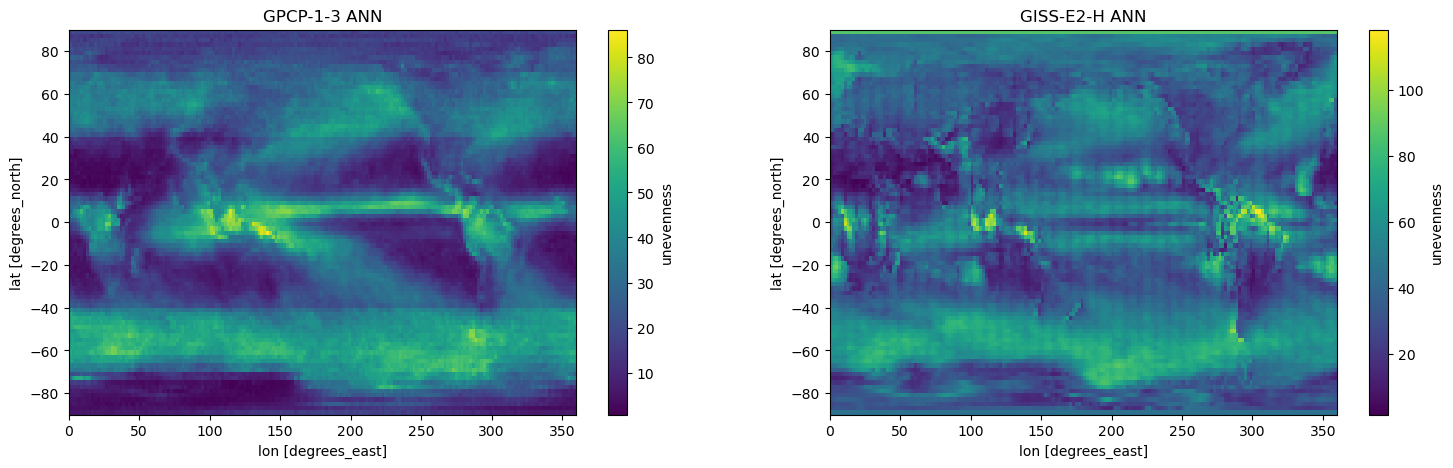

In [10]:
obs_file = f"{output_dir}/dist_cumfrac_metrics_regrid.180x90_GPCP-1-3.nc"
model_file = f"{output_dir}/dist_cumfrac_metrics_regrid.180x90_GISS-E2-H.r6i1p1.nc"

ds_obs = xr.open_dataset(obs_file)
ds_model = xr.open_dataset(model_file)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 5))

ds_obs[data_var].sel(month=0).plot(ax=ax0)
ax0.set_title("GPCP-1-3 ANN")

ds_model[data_var].sel(month=0).plot(label="GISS-E2-H ANN", ax=ax1)
ax1.set_title("GISS-E2-H ANN")


### Metrics

JSON files

In [11]:
json_file = f"{output_dir}/dist_frq.amt_metrics_domain_regrid.180x90_GISS-E2-H.r6i1p1.json"

In [12]:
# print json file content
import json
with open(json_file) as data_file:
    data = json.load(data_file)
    print(json.dumps(data, indent=4))

{
    "RESULTS": {
        "GISS-E2-H.r6i1p1": {
            "amtP10": {
                "Land_30N50N": {
                    "ANN": 0.1316342164059363,
                    "CalendarMonths": {
                        "1": 0.1316342164059363,
                        "2": 0.1316342164059363,
                        "3": 0.1316342164059363,
                        "4": 0.1316342164059363,
                        "5": 0.1316342164059363,
                        "6": 0.1316342164059363,
                        "7": 0.1316342164059363,
                        "8": 0.1316342164059363,
                        "9": 0.1316342164059363,
                        "10": 0.1316342164059363,
                        "11": 0.1316342164059363,
                        "12": 0.1316342164059363
                    },
                    "DJF": 0.1279104316973477,
                    "JJA": 0.1316342164059363,
                    "MAM": 0.1316342164059363,
                    "SON": 0.1316342164059363
       